In [6]:
import itertools
import six.moves.cPickle as pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

########
# Datasets sizes and class distributions
########
from DLRBM_2D_temporal import *
funcs = DLRBM_2D_temporal()
traindata_path= 'allLpatches_10x10x5.pklz' #'allLpatches_subs_smaller.pklz' #'allLpatches.pklz'
trainUdata_path= 'allUpatches_10x10x5.pklz'#'allUpatches_subs_smaller.pklz' #'allUpatches.pklz'
labeldata_path= 'allLabels_10x10x5.pklz' #'allLabels_subs_smaller.pklz' #'allLabels.pklz'

# read original data
datasets = funcs.load_wUdata(traindata_path, labeldata_path, trainUdata_path)

train_set_x, train_set_y = datasets[0]
np_train_x, np_train_y = datasets[3]
valid_set_x, valid_set_y = datasets[1]
np_valid_x, np_valid_y = datasets[4]        
test_set_x, test_set_y = datasets[2]
np_test_x, np_test_y = datasets[5]

... loading data
        lesion_id nmenh_dist nmenh_intenh
count       12350      12350        12350
unique        494          6            4
top           570        N/A          N/A
freq           25       5700        11400
Removing incomplete patches...
[]


Training set size n= 29595, vector size 10*10*5 = 500 
Validation set size n= 3690, vector size 10*10*5 = 500 
Test set size n= 3715, vector size 10*10*5 = 500 
 Total datasets n = 37000
 Training class 0 fractions = 0.666329, class 1 = 0.333671
Validation class 0 fractions = 0.668022, class 1 = 0.331978
Test set class 0 fractions = 0.663526, class 1 = 0.336474


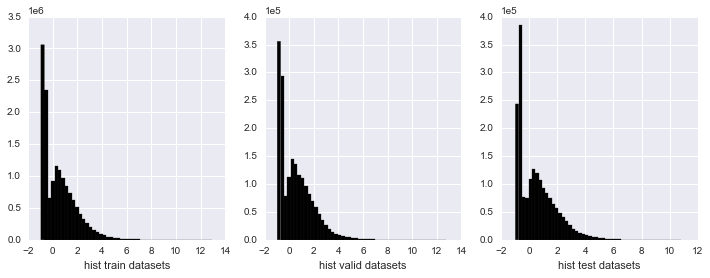

In [7]:
# some stats, like datasets sizes and histograms
print "Training set size n= %d, vector size 10*10*5 = %d " % (np.asarray(np_train_x).shape)
print "Validation set size n= %d, vector size 10*10*5 = %d " % (np.asarray(np_valid_x).shape)
print "Test set size n= %d, vector size 10*10*5 = %d " % (np.asarray(np_test_x).shape)
print "==========\n Total datasets n = %d" % (np.asarray(np_train_x).shape[0]+np.asarray(np_valid_x).shape[0]+np.asarray(np_test_x).shape[0])
print "==========\n Training class 0 fractions = %f, class 1 = %f" % (float(np.sum(np.asarray(np_train_y)==0))/len(np_train_y), float(np.sum(np.asarray(np_train_y)==1))/len(np_train_y))
print "Validation class 0 fractions = %f, class 1 = %f" % (float(np.sum(np.asarray(np_valid_y)==0))/len(np_valid_y), float(np.sum(np.asarray(np_valid_y)==1))/len(np_valid_y))
print "Test set class 0 fractions = %f, class 1 = %f" % (float(np.sum(np.asarray(np_test_y)==0))/len(np_test_y), float(np.sum(np.asarray(np_test_y)==1))/len(np_test_y))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].hist(np.asarray(np_train_x).ravel(), bins=50, color='black')
ax[0].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
ax[0].set_xlabel('hist train datasets')
ax[1].hist(np.asarray(np_valid_x).ravel(), bins=50, color='black')
ax[1].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
ax[1].set_xlabel('hist valid datasets')
ax[2].hist(np.asarray(np_test_x).ravel(), bins=50, color='black')
ax[2].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
ax[2].set_xlabel('hist test datasets')
plt.show()


Input type = 10x10x5 non subtracted patches

In [10]:
############
### Define grid search parameters
############
output_folder='DBN_plots'
pretraining_epochs=200
training_epochs=500
pretrain_lr = [0.1]
finetune_lr= [0.1]
kCD = [1] 
nlayers = [1,2,3]
hidden_layers_sizesList = [100,225,400,625]
hidden_layers_sidelen = [10,15,20,25] # [30,15,18,30]
batch_sizes = [50,10]
k=0

for item in itertools.product(nlayers, hidden_layers_sizesList, pretrain_lr, finetune_lr, kCD, batch_sizes): 
    k+=1
    print(k,item)

(1, (1, 100, 0.1, 0.1, 1, 50))
(2, (1, 100, 0.1, 0.1, 1, 10))
(3, (1, 225, 0.1, 0.1, 1, 50))
(4, (1, 225, 0.1, 0.1, 1, 10))
(5, (1, 400, 0.1, 0.1, 1, 50))
(6, (1, 400, 0.1, 0.1, 1, 10))
(7, (1, 625, 0.1, 0.1, 1, 50))
(8, (1, 625, 0.1, 0.1, 1, 10))
(9, (2, 100, 0.1, 0.1, 1, 50))
(10, (2, 100, 0.1, 0.1, 1, 10))
(11, (2, 225, 0.1, 0.1, 1, 50))
(12, (2, 225, 0.1, 0.1, 1, 10))
(13, (2, 400, 0.1, 0.1, 1, 50))
(14, (2, 400, 0.1, 0.1, 1, 10))
(15, (2, 625, 0.1, 0.1, 1, 50))
(16, (2, 625, 0.1, 0.1, 1, 10))
(17, (3, 100, 0.1, 0.1, 1, 50))
(18, (3, 100, 0.1, 0.1, 1, 10))
(19, (3, 225, 0.1, 0.1, 1, 50))
(20, (3, 225, 0.1, 0.1, 1, 10))
(21, (3, 400, 0.1, 0.1, 1, 50))
(22, (3, 400, 0.1, 0.1, 1, 10))
(23, (3, 625, 0.1, 0.1, 1, 50))
(24, (3, 625, 0.1, 0.1, 1, 10))


In [14]:
########
# Grid search parameters reasults
########
# best performance on validation (selected parameters)
pkl_filegridS = open('2D_DBN_gridSearch_results_10x10x5.pkl','rb')
dfresults = pickle.load(pkl_filegridS)
print dfresults

# find best perfoming params
avergAccu = (dfresults['Acuvalid0'])+np.asarray(dfresults['Acuvalid1'])
avergAccu = avergAccu/2
bestAccu = dfresults[avergAccu==np.max(avergAccu)]
print "best performing on Acuvalid parameters DBN"
print bestAccu, max(avergAccu)


# find best perfoming params
avergAccu = (dfresults['Acutest0'])+np.asarray(dfresults['Acutest1'])
avergAccu = avergAccu/2
bestAccu = dfresults[avergAccu==np.max(avergAccu)]
print "best performing on Acutest parameters DBN"
print bestAccu, max(avergAccu)


   nlayers  nhiddens  lr_pretrain  finetune_lr  kCD  batch_size  Acutrain0  \
0        1       100          0.1          0.1    1          50   6.130832   
0        1       100          0.1          0.1    1          10  82.494929   
0        1       225          0.1          0.1    1          10   0.050710   
0        1       225          0.1          0.1    1          10  53.646045   
0        1       400          0.1          0.1    1          50   0.000000   
0        1       400          0.1          0.1    1          10   0.000000   
0        1       625          0.1          0.1    1          50   0.000000   
0        1       625          0.1          0.1    1          10   0.000000   
0        2       100          0.1          0.1    1          50  49.842799   
0        2       100          0.1          0.1    1          10  99.381339   
0        2       225          0.1          0.1    1          50   0.000000   
0        2       225          0.1          0.1    1          10 

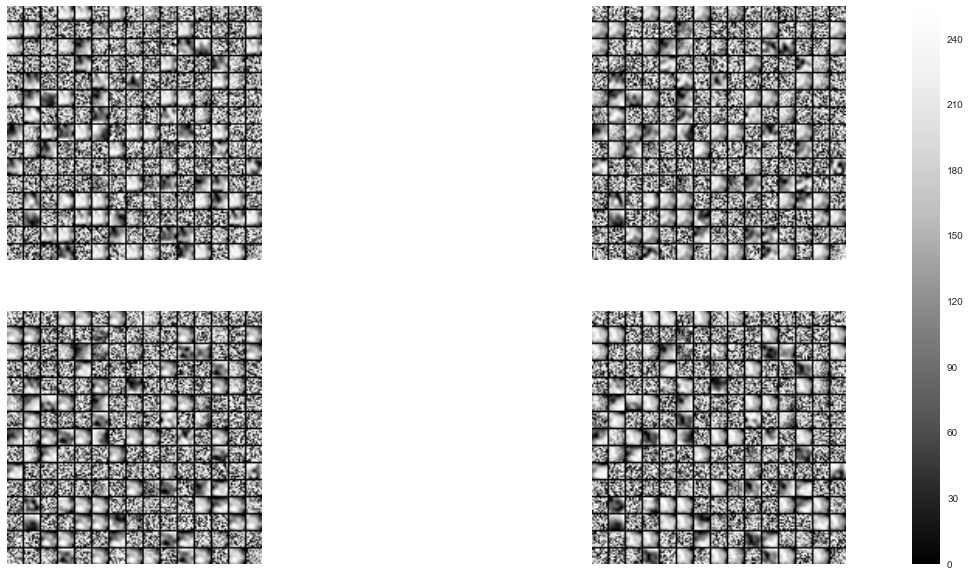

In [17]:
########
# Use best performing model to classify some examples
########
with open('bestDBN_10x10x5.obj', 'rb') as fp:
    bestDBN = pickle.load(fp)

#####################################
# Plot images in 2D
#####################################   
import matplotlib.pyplot as plt
%matplotlib inline

sidelen = 15
Wrbm = bestDBN.rbm_layers[0].W.get_value(borrow=True).T

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24, 10))
axes = axes.flatten()
for k in range(1,5):
    image = Image.fromarray(
            utils.tile_raster_images(
            X=Wrbm.reshape( Wrbm.shape[0], 5, 10, 10)[:,k,:,:],
            img_shape=(10,10),
            tile_shape=(sidelen,sidelen),
            tile_spacing=(1, 1) ))

    im = axes[k-1].imshow(image, cmap="Greys_r")  
    axes[k-1].get_xaxis().set_visible(False)
    axes[k-1].get_yaxis().set_visible(False)

cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat])
plt.colorbar(im, cax=cax, **kw)  


Label set class = 1 ==> predProb = [0.000000,1.000000], pred class = 1.000000
Label set class = 0 ==> predProb = [0.806045,0.193955], pred class = 0.000000


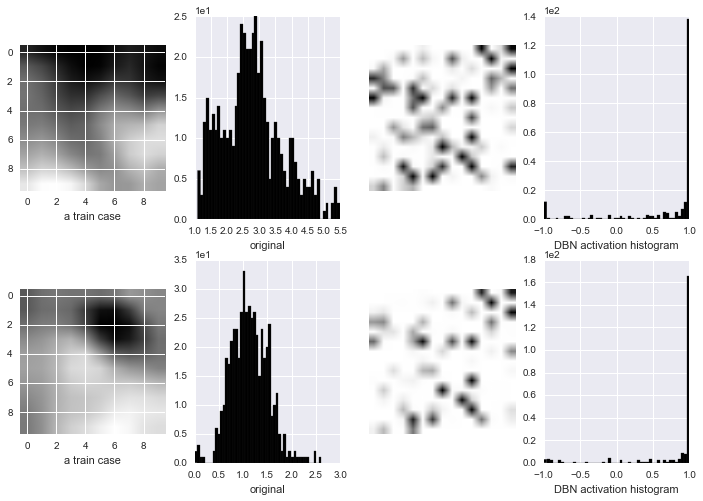

In [25]:
###############
# predicting using the SDA
###############
# take train case #1, class 1
Vol = np_train_x[0].reshape(5,10,10)
imgslicestime = [Vol[0,:,:], Vol[1,:,:], Vol[2,:,:], Vol[3,:,:], Vol[4,:,:]]

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))
ax[0,0].imshow(imgslicestime[4], cmap=plt.cm.gray)
ax[0,0].set_adjustable('box-forced')
ax[0,0].set_xlabel('a train case')
    
ax[0,1].hist(Vol.ravel(), bins=50, color='black')
ax[0,1].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
ax[0,1].set_xlabel('original')
    
tmp = np_train_x[0]
# in this case just one layer
for L in bestDBN.sigmoid_layers:
    tmp = bestDBN.sigmoid_activate( tmp, L.W, L.b )
        
ax[0,2].imshow(tmp.reshape(15,15), cmap=plt.cm.gray)
ax[0,2].set_axis_off()
ax[0,2].set_adjustable('box-forced')
ax[0,3].hist(tmp.ravel(), bins=50, color='black')
ax[0,3].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
ax[0,3].set_xlabel('DBN activation histogram')
    
# finalize with log layer
predProb = bestDBN.softmax_activate( tmp, bestDBN.logLayer )
print "Label set class = %d ==> predProb = [%f,%f], pred class = %f" % (np_train_y[0],predProb[0],predProb[1],predProb.argmax() )


# take a train case #last one, class 0
Vol = np_train_x[len(np_train_x)-1].reshape(5,10,10)
imgslicestime = [Vol[0,:,:], Vol[1,:,:], Vol[2,:,:], Vol[3,:,:], Vol[4,:,:]]

ax[1,0].imshow(imgslicestime[4], cmap=plt.cm.gray)
ax[1,0].set_adjustable('box-forced')
ax[1,0].set_xlabel('a train case')
    
ax[1,1].hist(Vol.ravel(), bins=50, color='black')
ax[1,1].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
ax[1,1].set_xlabel('original')
    
tmp = np_train_x[len(np_train_x)-1]

# in this case just one layer
for L in bestDBN.sigmoid_layers:
    tmp = bestDBN.sigmoid_activate( tmp, L.W, L.b )
        
ax[1,2].imshow(tmp.reshape(15,15), cmap=plt.cm.gray)
ax[1,2].set_axis_off()
ax[1,2].set_adjustable('box-forced')
ax[1,3].hist(tmp.ravel(), bins=50, color='black')
ax[1,3].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
ax[1,3].set_xlabel('DBN activation histogram')
    
# finalize with log layer
predProb = bestDBN.softmax_activate( tmp, bestDBN.logLayer )
print "Label set class = %d ==> predProb = [%f,%f], pred class = %f" % (np_train_y[len(np_train_x)-1],predProb[0],predProb[1],predProb.argmax() )


Label set class = 1 ==> predProb = [0.809413,0.190587], pred class = 0.000000
Label set class = 0 ==> predProb = [0.158105,0.841895], pred class = 1.000000


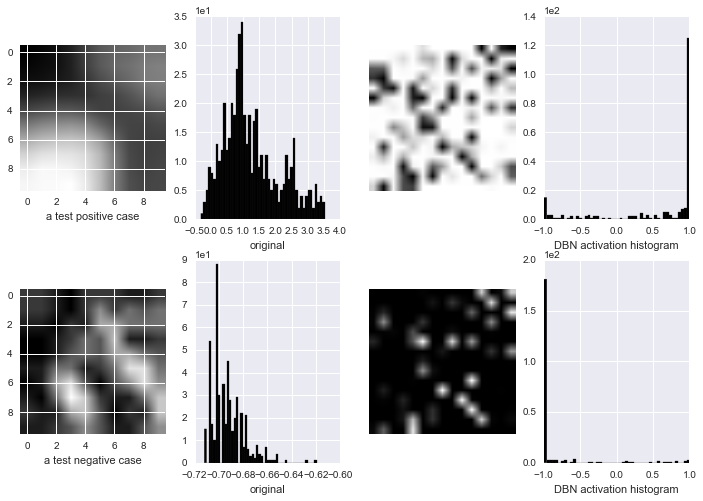

In [27]:
###############
# predicting using the DBN on Test set
###############
# take train case #1, class 1
Vol = np_test_x[0].reshape(5,10,10)
imgslicestime = [Vol[0,:,:], Vol[1,:,:], Vol[2,:,:], Vol[3,:,:], Vol[4,:,:]]

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))
ax[0,0].imshow(imgslicestime[4], cmap=plt.cm.gray)
ax[0,0].set_adjustable('box-forced')
ax[0,0].set_xlabel('a test positive case')
    
ax[0,1].hist(Vol.ravel(), bins=50, color='black')
ax[0,1].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
ax[0,1].set_xlabel('original')
    
tmp = np_test_x[0]
# in this case just one layer
for L in bestDBN.sigmoid_layers:
    tmp = bestDBN.sigmoid_activate( tmp, L.W, L.b )
        
ax[0,2].imshow(tmp.reshape(15,15), cmap=plt.cm.gray)
ax[0,2].set_axis_off()
ax[0,2].set_adjustable('box-forced')
ax[0,3].hist(tmp.ravel(), bins=50, color='black')
ax[0,3].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
ax[0,3].set_xlabel('DBN activation histogram')
    
# finalize with log layer
predProb = bestDBN.softmax_activate( tmp, bestDBN.logLayer )
print "Label set class = %d ==> predProb = [%f,%f], pred class = %f" % (np_train_y[0],predProb[0],predProb[1],predProb.argmax() )


# take a train case #last one, class 0
Vol = np_test_x[len(np_test_x)-1].reshape(5,10,10)
imgslicestime = [Vol[0,:,:], Vol[1,:,:], Vol[2,:,:], Vol[3,:,:], Vol[4,:,:]]

ax[1,0].imshow(imgslicestime[4], cmap=plt.cm.gray)
ax[1,0].set_adjustable('box-forced')
ax[1,0].set_xlabel('a test negative case')
    
ax[1,1].hist(Vol.ravel(), bins=50, color='black')
ax[1,1].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
ax[1,1].set_xlabel('original')
    
tmp = np_test_x[len(np_test_x)-1]

# in this case just one layer
for L in bestDBN.sigmoid_layers:
    tmp = bestDBN.sigmoid_activate( tmp, L.W, L.b )
        
ax[1,2].imshow(tmp.reshape(15,15), cmap=plt.cm.gray)
ax[1,2].set_axis_off()
ax[1,2].set_adjustable('box-forced')
ax[1,3].hist(tmp.ravel(), bins=50, color='black')
ax[1,3].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
ax[1,3].set_xlabel('DBN activation histogram')
    
# finalize with log layer
predProb = bestDBN.softmax_activate( tmp, bestDBN.logLayer )
print "Label set class = %d ==> predProb = [%f,%f], pred class = %f" % (np_test_y[len(np_test_y)-1],predProb[0],predProb[1],predProb.argmax() )
